## Pumpkin Pricing

Load up required libraries and dataset. Convert the data to a dataframe containing a subset of the data: 

- Only get pumpkins priced by the bushel
- Convert the date to a month
- Calculate the price to be an average of high and low prices
- Convert the price to reflect the pricing by bushel quantity

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

pumpkins = pd.read_csv('../data/US-pumpkins.csv')

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [22]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)

price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

month = pd.DatetimeIndex(pumpkins['Date']).month
day_of_year = pd.to_datetime(pumpkins['Date']).apply(lambda dt: (dt-datetime(dt.year,1,1)).days)

new_pumpkins = pd.DataFrame(
    {'Month': month, 
     'DayOfYear' : day_of_year, 
     'Variety': pumpkins['Variety'], 
     'City': pumpkins['City Name'], 
     'Package': pumpkins['Package'], 
     'Low Price': pumpkins['Low Price'],
     'High Price': pumpkins['High Price'], 
     'Price': price})

new_pumpkins.loc[new_pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/1.1
new_pumpkins.loc[new_pumpkins['Package'].str.contains('1/2'), 'Price'] = price*2

new_pumpkins.head()


,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.0,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.0,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.0,15.0,13.636364


A basic scatterplot reminds us that we only have month data from August through December. We probably need more data to be able to draw conclusions in a linear fashion.

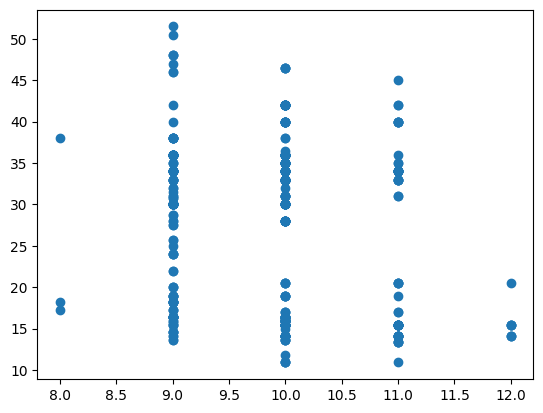

In [23]:
import matplotlib.pyplot as plt
plt.scatter('Month','Price',data=new_pumpkins)

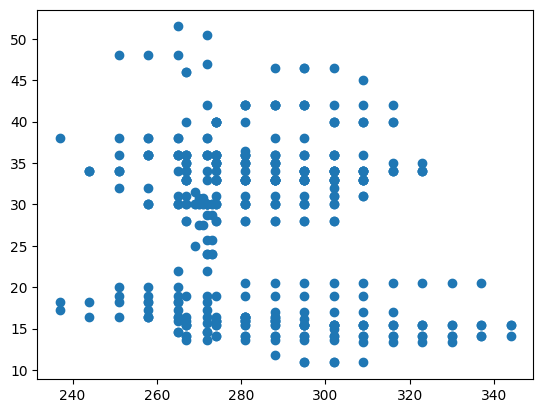

In [24]:

plt.scatter('DayOfYear','Price',data=new_pumpkins)

# Tasks
1. Find a numerica feature that has strong correlation with Price. Use it to predict.
* **Note**: correlation coefficient can only be calculated b/w numeric variables
2. Train with Polynomial regression
3. Add categorical features

In [25]:
new_pumpkins.describe(include=["object", "number"])

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
count,415.000000,415.000000,415,415,415,415.000000,415.000000,415.000000
unique,NaN,NaN,4,10,5,NaN,NaN,NaN
top,NaN,NaN,MINIATURE,CHICAGO,1/2 bushel cartons,NaN,NaN,NaN
freq,NaN,NaN,262,103,234,NaN,NaN,NaN
mean,9.838554,285.086747,NaN,NaN,NaN,18.007831,18.989759,27.707010
std,0.748885,20.555385,NaN,NaN,NaN,5.273335,5.694920,9.815351
min,8.000000,237.000000,NaN,NaN,NaN,10.750000,12.000000,10.909091
25%,9.000000,271.000000,NaN,NaN,NaN,15.000000,17.000000,16.363636
50%,10.000000,281.000000,NaN,NaN,NaN,17.000000,18.000000,30.000000
75%,10.000000,302.000000,NaN,NaN,NaN,18.000000,19.000000,35.000000


In [26]:
new_pumpkins["Month"].corr(new_pumpkins["Price"])

-0.14878293554077526

In [27]:
new_pumpkins["DayOfYear"].corr(new_pumpkins["Price"])

-0.1667332249274541

Month: r2 of training set: 0.03366494943977916, r2 of test set: -0.06381381469079939, mse of test: 90.59685707586856


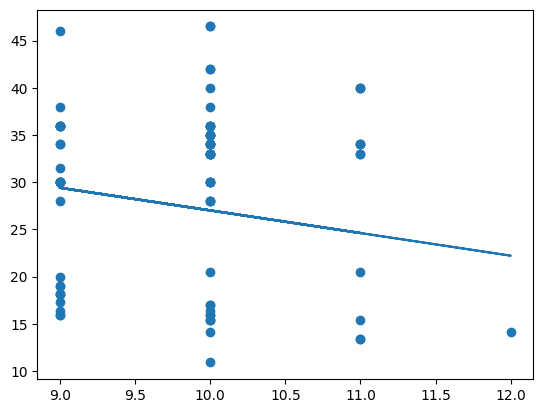

In [28]:
# Use Month to predict
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
p = make_pipeline(LinearRegression())
X = new_pumpkins["Month"].to_numpy().reshape(-1,1)
y = new_pumpkins["Price"].to_numpy().reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
p.fit(X_train, y_train)
y_pred = p.predict(X_test)
r2 = r2_score(y_test, y_pred)
score = p.score(X_train, y_train)
print(f"Month: r2 of training set: {score}, r2 of test set: {r2}, mse of test: {mean_squared_error(y_test, y_pred)}")
fig,ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X_test, y_test)
ax.plot(X_test, y_pred)

DayOfYear: r2 of training set: 0.020116748439178767, r2 of test set: 0.03201845405797821, mse of test: 99.98321914479833


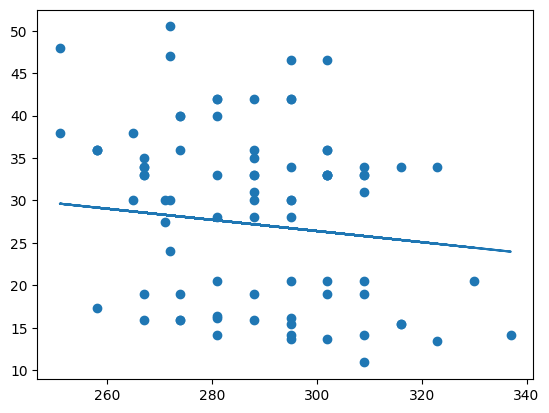

In [29]:
p = make_pipeline(LinearRegression())
X = new_pumpkins[["DayOfYear"]]
y = new_pumpkins[["Price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
p.fit(X_train, y_train)
y_pred = p.predict(X_test)
r2 = r2_score(y_test, y_pred)
score = p.score(X_train, y_train)
print(f"DayOfYear: r2 of training set: {score}, r2 of test set: {r2}, mse of test: {mean_squared_error(y_test, y_pred)}")
fig,ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X_test, y_test)
ax.plot(X_test, y_pred)

Polynomial DayOfYear: r2 of training set: 0.06656762807895866, r2 of test set: 0.023279789636337256, mse of test: 91.21631241542799


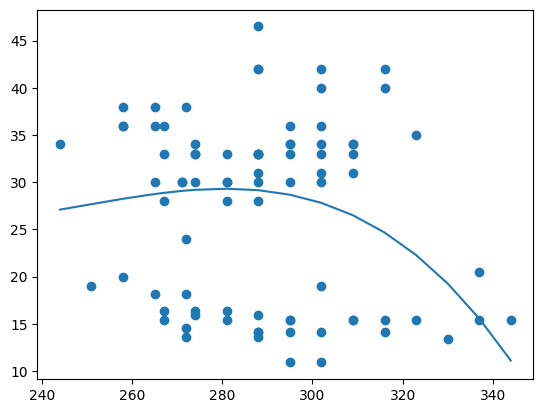

In [30]:
## Use Polynomial
from sklearn.preprocessing import PolynomialFeatures
p = make_pipeline(PolynomialFeatures(3), LinearRegression())
X = new_pumpkins[["DayOfYear"]]
y = new_pumpkins[["Price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
p.fit(X_train, y_train)
X_test = X_test.sort_values("DayOfYear")
y_test = y_test.loc[X_test.index]
y_pred = p.predict(X_test)
r2 = r2_score(y_test, y_pred)
score = p.score(X_train, y_train)
print(f"Polynomial DayOfYear: r2 of training set: {score}, r2 of test set: {r2}, mse of test: {mean_squared_error(y_test, y_pred)}")
fig,ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(X_test, y_test)
ax.plot(X_test, y_pred)

In [31]:
## Use all features
## first one hot encode 
new_pumpkins

,Month,DayOfYear,Variety,City,Package,Low Price,High Price,Price
70,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,13.636364
71,9,267,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,16.363636
72,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,18.00,18.0,16.363636
73,10,274,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,17.00,17.0,15.454545
74,10,281,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,15.00,15.0,13.636364
...,...,...,...,...,...,...,...,...
1738,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,15.00,15.0,30.000000
1739,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,13.75,15.0,28.750000
1740,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,10.75,15.0,25.750000
1741,9,273,MINIATURE,ST. LOUIS,1/2 bushel cartons,12.00,12.0,24.000000


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
categorical_features = ["Month", "Variety", "City", "Package"]
numeric_features = ["DayOfYear"]
categorical_preprocessor = Pipeline(steps= [("encoder", OneHotEncoder())])
numeric_preprocessor = Pipeline(steps =[("scaler", StandardScaler())])
preprocessor = ColumnTransformer(
    transformers=[
     ("categorical", categorical_preprocessor, categorical_features),
     #("numeric", numeric_preprocessor, numeric_features)
    ]
)

p = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("classifier",LinearRegression())])
X = new_pumpkins[categorical_features + numeric_features]
y = new_pumpkins[["Price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
p.fit(X_train, y_train)
y_pred = p.predict(X_test)
r2 = r2_score(y_test, y_pred)
score = p.score(X_train, y_train)
print(f"Polynomial DayOfYear: r2 of training set: {score}, r2 of test set: {r2}, mse of test: {mean_squared_error(y_test, y_pred)}")

Polynomial DayOfYear: r2 of training set: 0.9445718433039099, r2 of test set: 0.9063239610767273, mse of test: 8.18017808444065


In [54]:
# Polynomial with all features
categorical_features = ["Month", "Variety", "City", "Package"]
numeric_features = ["DayOfYear"]
categorical_preprocessor = Pipeline(steps= [("encoder", OneHotEncoder())])
numeric_preprocessor = Pipeline(steps =[("scaler", StandardScaler())])
numeric = ColumnTransformer(
    transformers=[
     ("categorical", categorical_preprocessor, categorical_features),
    ]
)

p = Pipeline(
    steps=[("preprocessor", preprocessor), 
           ("polynomial", PolynomialFeatures(2)),
           ("classifier", LinearRegression())])
X = new_pumpkins[categorical_features + numeric_features]
y = new_pumpkins[["Price"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
p.fit(X_train, y_train)
y_pred = p.predict(X_test)
r2 = r2_score(y_test, y_pred)
score = p.score(X_train, y_train)
print(f"Polynomial DayOfYear: r2 of training set: {score}, r2 of test set: {r2}, mse of test: {mean_squared_error(y_test, y_pred)}")

Polynomial DayOfYear: r2 of training set: 0.96433034011914, r2 of test set: 0.9647044148857918, mse of test: 3.935109508349472


In [51]:
y_test["pred"] = y_pred

In [52]:
X_test.loc[y_test[(y_test.Price - y_test.pred) > 0.5].index]

,Month,Variety,City,Package,DayOfYear
1720,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,269
1538,10,MINIATURE,SAN FRANCISCO,1/2 bushel cartons,281
1039,9,MINIATURE,COLUMBIA,1/2 bushel cartons,244
1239,9,MINIATURE,NEW YORK,1/2 bushel cartons,258
1584,10,MINIATURE,SAN FRANCISCO,1/2 bushel cartons,302
1642,9,MINIATURE,PHILADELPHIA,1/2 bushel cartons,267
1731,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,272
713,10,PIE TYPE,CHICAGO,1 1/9 bushel cartons,295
1582,10,MINIATURE,SAN FRANCISCO,1/2 bushel cartons,288
75,10,PIE TYPE,BALTIMORE,1 1/9 bushel cartons,281
